# This is where we use the Algorithms

In [1]:
# TODO: Write a guide on what you need, https://anaconda.org/anaconda/gensim <---- Gensim
#       What does the error message mean?

import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Algorithms ###
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split # Used to split data into Training set and Test Set

C:\Users\raslindn\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Loading Files

In [2]:
# Load the post data
#df = pd.read_csv("../alteredData.csv")
#df = pd.read_csv("../alteredData100k.csv")
df = pd.read_csv("../alteredData1M.csv")
#df1 = pd.read_csv("../data.csv")

## Preprocessing with a Custom Hot One Encoding

In [3]:
# http://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python <--- This is dank stuff

#TODO:
# Concider changing this to Word Embedding instead (Gensim)
# Concider to add new information instead of re-reading everything
# Should be saved into three different file?

#from sklearn.feature_extraction import DictVectorizer
#dictVector = DictVectorizer(sparse = False, sort = False)
#qualitative_features = ['Name', 'Street', 'City']
#X_qual = dictVector.fit_transform(df[qualitative_features].to_dict('records'))
# Print the List
#dictVector.vocabulary_

In [4]:
# Sanity Check
#df.ix[[0, 33, 39, 55]]

In [5]:
# Debug #
#df.loc[df['Name'] == 7]
#df1.head()

In [6]:
#df.head()

In [7]:
# Change all missing values to 'missing'

df['Name']     = df['Name'].fillna('missing')
df['SurName']  = df['SurName'].fillna('missing')
df['Street']   = df['Street'].fillna('missing')
df['StreetNr'] = df['StreetNr'].fillna(-1)
df['ZipCode'] = df['ZipCode'].fillna(-1)
df['City']     = df['City'].fillna('missing')
#df.loc[df['Legitimate'] == False]
df.loc[df['StreetNr'] == 20]

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate
66,Fatimah,Lonon,missing,20,60136.0,missing,False
238,Bianca,missing,Mineralgatan,20,3915.0,Kalmar,False
369,Carolin,Wiechmann,Adlerberthsgatan,20,21123.0,Malmo,True
587,Pearlene,Robison,Bondegatan,20,41136.0,Goteborg,True
764,Joleen,Bright,Ekorrstigen,20,21146.0,Malmo,True
781,Heriberto,Mcguffie,Mineralgatan,20,30157.0,Halmstad,True
1130,Jerica,Granillo,missing,20,58174.0,Linkoping,False
1242,Cordia,Bunge,Allhelgonagatan,20,63125.0,Eskilstuna,True
1376,Sandie,Freese,Alsta,20,75167.0,Uppsala,True
1578,Lieselotte,Halberg,Nyhem,20,4119.0,Goteborg,False


In [8]:
#Check for null values
df.isnull().values.any()

False

In [9]:
# Shows the RowsxColumns
df.shape

(1000000, 7)

In [10]:
# This is a simple encoder which replaces Strings with a number

# TODO:
# Should save the corresponding number to the corresponding string in a file

from sklearn.preprocessing import LabelEncoder

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+ feature)
        return df
    
dummyEncode(df)


# Chane True/False to 1/0
correctAdress = {True : 1, False : 0}
df['Legitimate'] = df['Legitimate'].map(correctAdress)

df.select_dtypes

df.head()

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate
0,72,21,32,132,65168.0,8,1
1,3,19,8,176,65174.0,8,1
2,51,100,13,69,55167.0,6,1
3,70,3,40,196,63178.0,1,1
4,6,50,12,152,50165.0,0,1


### Check True/False Ratio

In [11]:
num_true = len(df.loc[df['Legitimate'] == True])
num_false = len(df.loc[df['Legitimate'] == False])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))

Number of True cases: 816622 (81.66%)
Number of False cases: 183378 (18.34%)


### Split Data

In [12]:
# Divides the Train data and Test data into a 70/30 split

#X_train = pd.get_dummies(df)
#X_test = pd.get_dummies(df)


feature_col_names = ['Name', 'City', 'Street', 'StreetNr', 'ZipCode', 'SurName']
prediction_class_name = ['Legitimate']

#ddf = pd.get_dummies(df)

X = df[feature_col_names].values     # predictor feature columnd (8 X m)
y = df[prediction_class_name].values # predicted calss (1 = true, 0 = false) column (1 X m)
split_test_size = 0.70

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42) # 42 is the answer to everything


In [13]:
#Print to check if the split was to our liking

print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

30.00% in training set
70.00% in test set


### Verifying predicted value was split correctly

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 1]), len(df.loc[df['Legitimate'] == 1]) / len(df.index) * 100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Legitimate'] == 0]), len(df.loc[df['Legitimate'] == 0]) / len(df.index) * 100))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), len(y_train[y_train[:] == 1]) / len(y_train) * 100))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), len(y_train[y_train[:] == 0]) / len(y_train) * 100))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1]) / len(y_test) * 100))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), len(y_test[y_test[:] == 0]) / len(y_test) * 100))

Original True  : 816622 (81.66%)
Original False : 183378 (18.34%)

Training True  : 245072 (81.69%)
Training False : 54928 (18.31%)

Test True      : 571550 (81.65%)
Test False     : 128450 (18.35%)


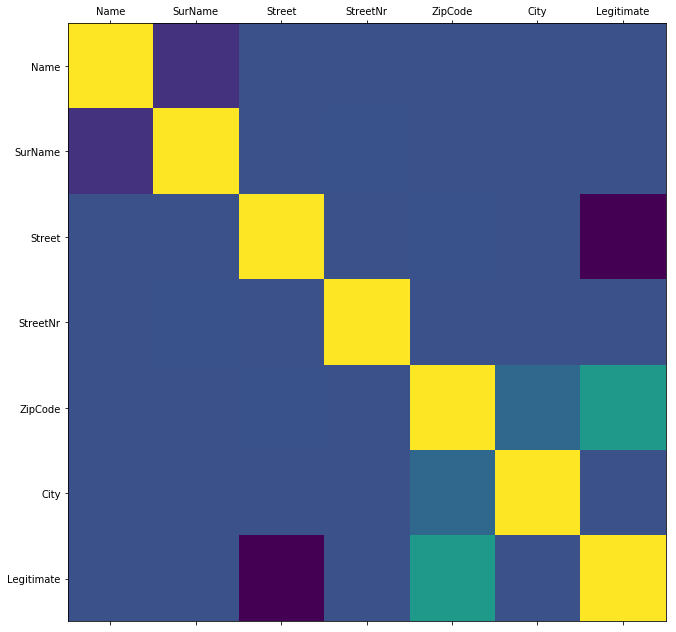

In [15]:
def plot_corr(df, size=11):
    # data frame correlation function
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    
    # color code the rectangles by correlation value
    ax.matshow(corr)
    
    # draw x tick marks
    plt.xticks(range(len(corr.columns)), corr.columns)
    # draw y tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

In [16]:
df.corr()

,Name,SurName,Street,StreetNr,ZipCode,City,Legitimate
Name,1.000000,-0.138307,-0.001859,0.000634,-0.002282,-0.001133,-0.000647
SurName,-0.138307,1.000000,-0.003101,0.003309,0.000430,0.000912,0.000147
Street,-0.001859,-0.003101,1.000000,0.001119,0.001408,-0.000588,-0.331579
StreetNr,0.000634,0.003309,0.001119,1.000000,-0.001151,-0.000188,-0.001118
ZipCode,-0.002282,0.000430,0.001408,-0.001151,1.000000,0.111421,0.383389
City,-0.001133,0.000912,-0.000588,-0.000188,0.111421,1.000000,0.001010
Legitimate,-0.000647,0.000147,-0.331579,-0.001118,0.383389,0.001010,1.000000


## Random Forest Test

In [17]:
from sklearn import metrics

rf_model = RandomForestClassifier(random_state = 42) # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [18]:
rf_predict_train = rf_model.predict(X_train)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy 1.0000


In [19]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy 1.0000


In [20]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))


#[[True-Positive, False-Negative]
#[False-Positive, True-Negative]]

Confusion Matrix
[[571550      0]
 [     0 128450]]

Classification Report
             precision    recall  f1-score   support

          1       1.00      1.00      1.00    571550
          0       1.00      1.00      1.00    128450

avg / total       1.00      1.00      1.00    700000



## Naive Bayers

In [21]:
from sklearn.preprocessing import Imputer

#fill_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

#X_train = fill_0.fit_transform(X_train)
#X_test  = fill_0.fit_transform(X_test)

In [22]:
# Training Bayers

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [23]:
# Performance on Training Data
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

#Accuracy
print("Accuracy: {0:.6f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.863127



In [24]:
# predict values using the test data
nb_predict_test = nb_model.predict(X_test)

# trainint metrics
print("Accuracy: {0:.6f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.863333



In [25]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[559776  11774]
 [ 83893  44557]]

Classification Report
             precision    recall  f1-score   support

          1       0.87      0.98      0.92    571550
          0       0.79      0.35      0.48    128450

avg / total       0.86      0.86      0.84    700000



### Logistic Regression

In [26]:
lr_model = lr_model = LogisticRegression(n_jobs=-1,C = 0.7, random_state = 42, penalty='l1')

lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_predict_train = lr_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("")

Accuracy: 0.8514



In [28]:
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("Recall: {0:.4f}".format(metrics.recall_score(y_test, lr_predict_test)))
print("")

Accuracy: 0.8514
Recall: 0.9469



In [29]:
print("Confusion Matrix")
# Note the use of labels for set 1 = True to upper left and 0 = False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels = [1, 0]))

Confusion Matrix
[[541213  30337]
 [ 73697  54753]]

Classification Report
             precision    recall  f1-score   support

          1       0.88      0.95      0.91    571550
          0       0.64      0.43      0.51    128450

avg / total       0.84      0.85      0.84    700000



### Logistic CV

In [30]:
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, cv = 10, refit = True)
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [31]:
lr_cv_predict_train = lr_cv_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print("")

Accuracy: 0.8510



In [32]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("")

Accuracy: 0.8512



In [33]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels = [1, 0]))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels = [1, 0]))

Confusion Matrix
[[537998  33552]
 [ 70618  57832]]

Classification Report
             precision    recall  f1-score   support

          1       0.88      0.94      0.91    571550
          0       0.63      0.45      0.53    128450

avg / total       0.84      0.85      0.84    700000



## Improvement tries

Now since we have rougly 70-30 split in our data regarding true and false outcomes, we know the class is unbalanced and it should be because people do not misswrite 50% of the adresses. Ergo we do not need to ponder about this.

Moving on, the first thing to try is to increase the recall score which is a metric for the models performance since it is calcultated based upon how good the model was at predicting the outcome.
http://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
http://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report

# Lets start with trying to find the best parameters for regular logistic

Firt lets try to get the highest recall score based on the regularization varible C, which is the inverse of the regularization strentgh, ergo the lower value the stronger regularization

In [34]:
import pandas as pd              # pandas is a dataframe library
import matplotlib.pyplot as plt  # matplotlib.pyplot plots data
import numpy as np               # numpy provides N-dim object support

# do ploting inline instead of in a separate window
%matplotlib inline

### Algorithms ###
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
### Cross Validation ###
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_predict, KFold
### Splitting the data ###
from sklearn.model_selection import train_test_split 
### Evaluation metrics ###
from sklearn import metrics

In [37]:
# The data is split into test and training sets using a 70-30 split
# First we need to define the features to be used and the class to predict
#feature_col_names = ['Name', 'City', 'Street', 'StreetNr', 'Zip Code']
#prediction_class_name = ['Legitimate']

#X = df[feature_col_names].values     # predictor feature columns
#y = df[prediction_class_name].values # predicted class (1 = true, 0 = false) column

#split_test_size = 0.70  #70.00% in test set, 30.00% in training set

# Split the data using the built in train_test_split function
# Which gives us:
# X_train = addresses in training set
# y_train = actual class of the addresses in X_train
# X_test = addresses in test set
# y_test = actual class of the addresses in X_test

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

#print(metrics.classification_report(y_test, rf_predict_test, labels = [1, 0]))








# make a list of logarithmic values to use in LRCV
cslist = np.logspace(-10, 10, 100)

# The models
model = LogisticRegression(n_jobs=-1, C = 1.0, random_state = 42, class_weight='balanced')
# Standard LogReg were:
# n_jobs is the number of CPU cores to be used for the calculations, -1 equals to all cores
# C is the inverse of regularization strength, smaller values lead to stronger regularization, default 1.0
# random_state is the random seed to be used when shuffeling the data
modelcv = LogisticRegressionCV(n_jobs = -1, cv = 10, refit = True, random_state = 42, scoring='accuracy', Cs = cslist)
# LogReg that uses cross validation to find the best regularization parameter for the scoring parameter chosen
# It then uses this new parameter value to return the value of the scoring parameter
# n_jobs is the number of CPU cores to be used for the calculations, , -1 equals to all cores
# refit decides if the scores should be averaged over all folds 
# and the best score values are then used for a new run of the algorithm, otherwise all the scores are averaged
# random_state is the random seed to be used when shuffeling the data
modelNB = GaussianNB()

modelRF = RandomForestClassifier(random_state=42, n_jobs=-1,n_estimators=3)
modelRF.fit(X_train, y_train.ravel())
predictRF = modelRF.predict(X_test)


# First we train the model as normal
model.fit(X_train, y_train.ravel())
modelNB.fit(X_train, y_train.ravel())

# Then we get a prediction on the test data
predict = model.predict(X_test)
predictNB = modelNB.predict(X_test)


trainedcv = modelcv.fit(X_train, y_train.ravel())
predictcv = modelcv.predict(X_test)

kf = KFold(n_splits=10, random_state=42)
predictcv2 = cross_val_predict(model, X_test, y_test.ravel(), cv=kf)
predictNBcv = cross_val_predict(modelNB, X_test, y_test.ravel(), cv=kf)
predictRFCV = cross_val_predict(modelRF, X_test, y_test.ravel(), cv=kf)

cvC = trainedcv.C_

print (cvC)



#modellr2 = LogisticRegression(n_jobs=-1, C = cvC, random_state = 42)
#modellr2.fit(X_train, y_train.ravel())
#predictlr2 = modellr2.predict(X_test)

print ("Accuracy: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predict)),
       #"Accuracy: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictlr2)),
       "AccuracyCV: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictcv)),
       "AccuracyCVS: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictcv2)))

print ("AccuracyNB: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictNB)),
       "AccuracyNBCVS: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictNBcv)))

print ("AccuracyRF: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictRF)),
       "AccuracyRF: {0:.7f}".format(metrics.accuracy_score(y_test.ravel(), predictRFCV)))

print ("Recall: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predict)),
       #"Recall: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictlr2)),
       "RecallCV: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictcv)), 
       "RecallCVS: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictcv2)))

print("RecallNB: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictNB)),
      "RecallNBCVS: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictNBcv)))
        
print("RecallRF: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictRF)),
      "RecallRFCV: {0:.7f}".format(metrics.recall_score(y_test.ravel(), predictRFCV)))

print("{0}".format(metrics.confusion_matrix(y_test, predict, labels = [1, 0])))
#print("{0}".format(metrics.confusion_matrix(y_test, predictlr2, labels = [1, 0])))
print("{0}".format(metrics.confusion_matrix(y_test, predictcv, labels = [1, 0])))
print("{0}".format(metrics.confusion_matrix(y_test, predictcv2, labels = [1, 0])))
print("{0}".format(metrics.confusion_matrix(y_test, predictNB, labels = [1, 0])))
print("{0}".format(metrics.confusion_matrix(y_test, predictNBcv, labels = [1, 0])))
print("{0}".format(metrics.confusion_matrix(y_test, predictRF, labels = [1, 0])))
print("{0}".format(metrics.confusion_matrix(y_test, predictRFCV, labels = [1, 0])))
#[[True-Positive, False-Negative]
#[False-Positive, True-Negative]]

[  1.66810054e-08]
Accuracy: 0.7670286 AccuracyCV: 0.8834314 AccuracyCVS: 0.7666286
AccuracyNB: 0.8633329 AccuracyNBCVS: 0.8633700
AccuracyRF: 1.0000000 AccuracyRF: 1.0000000
Recall: 0.7610078 RecallCV: 1.0000000 RecallCVS: 0.7604846
RecallNB: 0.9793999 RecallNBCVS: 0.9793421
RecallRF: 1.0000000 RecallRFCV: 1.0000000
[[434954 136596]
 [ 26484 101966]]
[[571550      0]
 [ 81598  46852]]
[[434655 136895]
 [ 26465 101985]]
[[559776  11774]
 [ 83893  44557]]
[[559743  11807]
 [ 83834  44616]]
[[571550      0]
 [     0 128450]]
[[571550      0]
 [     0 128450]]


In [ ]:
print (predict)

'''
C_start = 0.0000001
C_end = 0.000001
C_increment = 0.00000001

#start at 0.1 as C then go all the way up to 5 to find the best fit
C_values, recall_scores = [], []
#save the recall score and the C

C_val = C_start
#what we are looking for 
best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)
    #train
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    #predict
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    #save the best value
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    #increment the c val
    C_val = C_val + C_increment

#plot the regulazation values vs the recall score
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max recall {0:.10f} at C={1:.10f}".format(best_recall_score, best_score_C_val))
print("Acc {0:.10f}".format(metrics.accuracy_score(y_test.ravel(), lr_predict_loop_test)))
'''

### The above loop takes 4ever to run
